In [228]:
# CPSC415/515 Big Data Programming
# Project 3: Visualization and Prediction of heart attacks
# Group: Cody Bauer, Demyre Ramp

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

heart_analysis_file_name = "heart.csv"

In [230]:
def load_data():
    
    # Load the CSV data into a DataFrame
    df = pd.read_csv(heart_analysis_file_name)
    
    # Extract data from each health parameter
    df.columns = ["Age", "Sex", "Chest Pain", "RBP", "Chol", "FBS", "RECG", "Max Heart Rate", "EXNG", "Old Peak", "Slope", "CAA", "Thalium", "Heart Attack"]

    return df

data_cleaned = load_data()
data_cleaned

,Age,Sex,Chest Pain,RBP,Chol,FBS,RECG,Max Heart Rate,EXNG,Old Peak,Slope,CAA,Thalium,Heart Attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


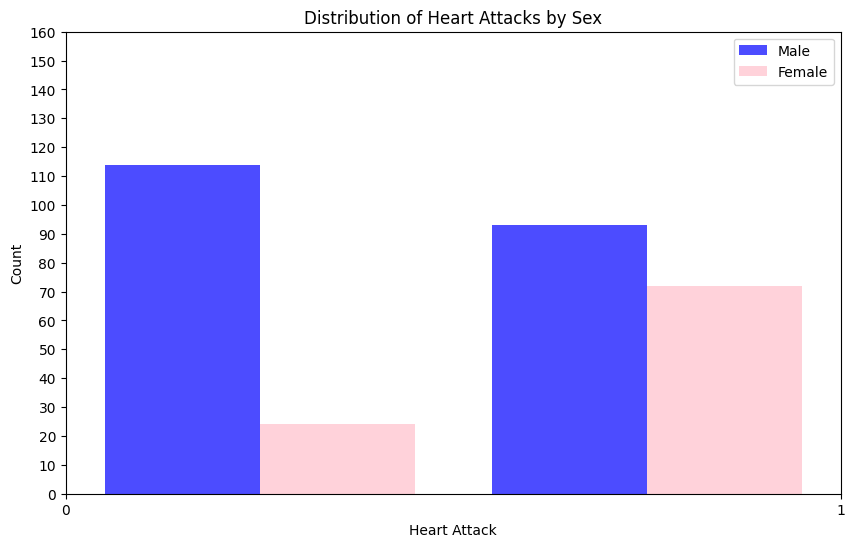

In [231]:
def plot_heart_attack_by_sex(data_cleaned):
    # Separate data by sex
    male_data = data_cleaned[data_cleaned['Sex'] == 1]['Heart Attack']
    female_data = data_cleaned[data_cleaned['Sex'] == 0]['Heart Attack']

    # Create a histogram
    plt.figure(figsize=(10, 6))

    # Plot the data
    bins = np.array([0, 1])
    plt.hist([male_data, female_data], bins=2, label=['Male', 'Female'], color=['blue', 'pink'], alpha=0.7)

    # Set X and Y-axis
    plt.xticks(ticks=[0, 1])
    max_count = max(data_cleaned['Heart Attack'].value_counts())
    plt.yticks(range(0, max_count+1, 10))

    # Adding titles and labels
    plt.title('Distribution of Heart Attacks by Sex')
    plt.xlabel('Heart Attack')
    plt.ylabel('Count')
    plt.legend()

    # Show the plot
    plt.show()

sorted = plot_heart_attack_by_sex(data_cleaned)
sorted


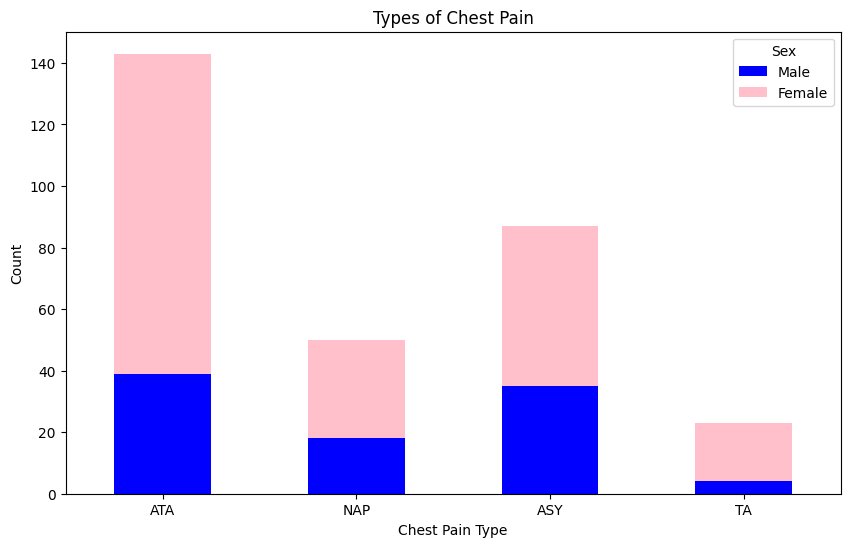

In [232]:
def plot_chest_pain_types(data_cleaned):
    # Get counts for each combination of ChestPainType and Sex
    counts = data_cleaned.groupby(['Chest Pain', 'Sex']).size().unstack(fill_value=0)

    # Create the bar plot
    ax = counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'pink'])

    # Set the title and labels
    ax.set_title('Types of Chest Pain')
    ax.set_xlabel('Chest Pain Type')
    ax.set_ylabel('Count')
    
    # Set x-axis tick labels upright
    ax.set_xticklabels(['ATA', 'NAP', 'ASY', 'TA'], rotation=0)

    # Add legend
    ax.legend(title='Sex', labels=['Male', 'Female'])

    # Show the plot
    plt.show()

# Call the function with the correct DataFrame
plot_chest_pain_types(data_cleaned)


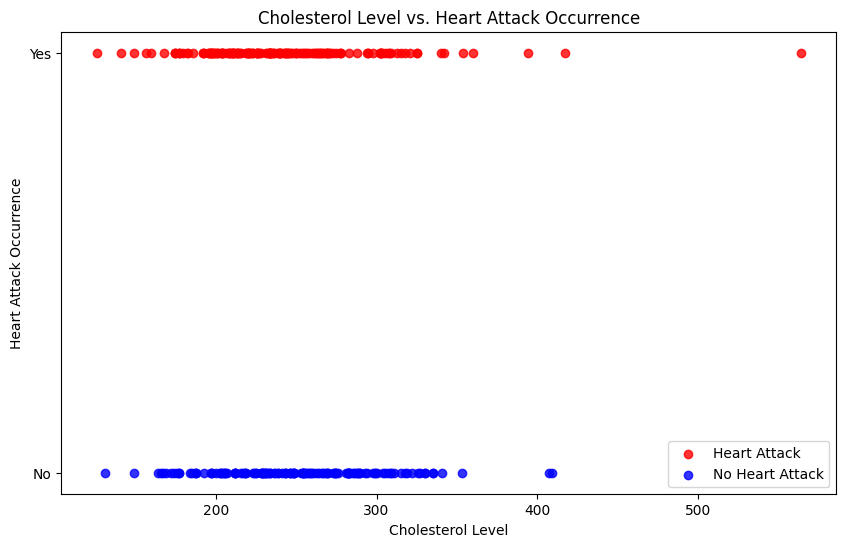

In [233]:
def visualize_cholesterol_heart_attack(df):
    # Split the data based on heart attack occurrence
    heart_attack = df[df['Heart Attack'] == 1]
    no_heart_attack = df[df['Heart Attack'] == 0]

    # Create scatter plots
    plt.figure(figsize=(10, 6))
    plt.scatter(heart_attack['Chol'], np.ones_like(heart_attack['Chol']), alpha=0.8, c='red', label='Heart Attack')
    plt.scatter(no_heart_attack['Chol'], np.zeros_like(no_heart_attack['Chol']), alpha=0.8, c='blue', label='No Heart Attack')

    # Adding labels and title
    plt.xlabel('Cholesterol Level')
    plt.ylabel('Heart Attack Occurrence')
    plt.yticks([0, 1], ['No', 'Yes'])
    plt.title('Cholesterol Level vs. Heart Attack Occurrence')
    plt.legend()

    # Show the plot
    plt.show()
    
visualize_cholesterol_heart_attack(data_cleaned)

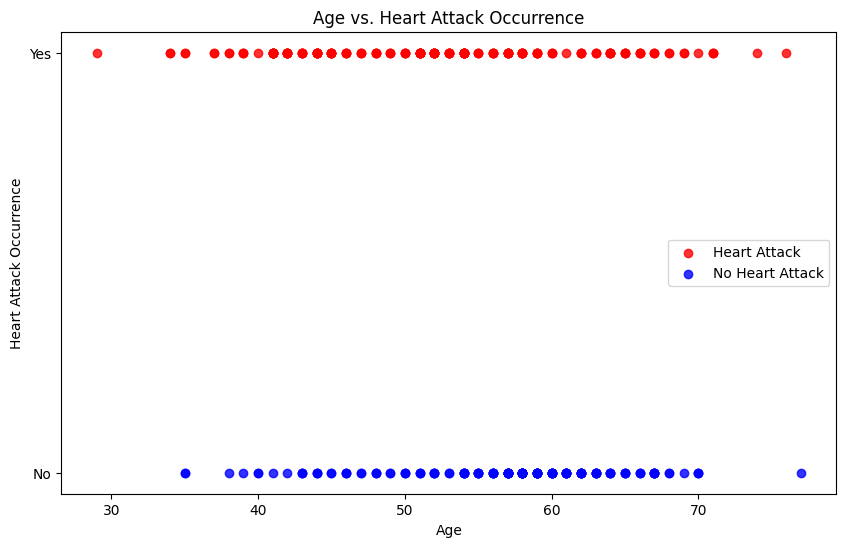

In [234]:
def visualize_age_heart_attack(df):
    # Split the data based on heart attack occurrence
    heart_attack = df[df['Heart Attack'] == 1]
    no_heart_attack = df[df['Heart Attack'] == 0]

    # Create scatter plots
    plt.figure(figsize=(10, 6))
    plt.scatter(heart_attack['Age'], np.ones_like(heart_attack['Age']), alpha=0.8, c='red', label='Heart Attack')
    plt.scatter(no_heart_attack['Age'], np.zeros_like(no_heart_attack['Age']), alpha=0.8, c='blue', label='No Heart Attack')

    # Adding labels and title
    plt.xlabel('Age')
    plt.ylabel('Heart Attack Occurrence')
    plt.yticks([0, 1], ['No', 'Yes'])
    plt.title('Age vs. Heart Attack Occurrence')
    plt.legend()

    # Show the plot
    plt.show()
    
visualize_age_heart_attack(data_cleaned)

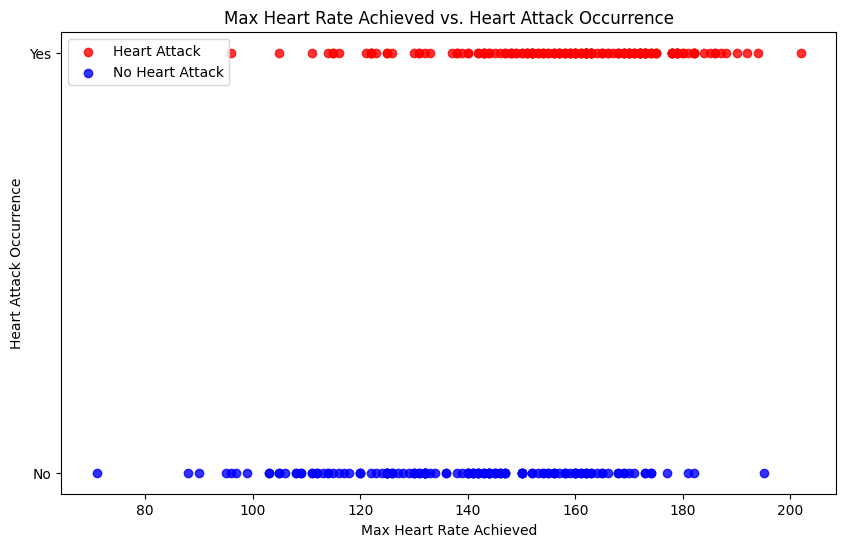

In [235]:
def visualize_max_heart_rate_heart_attack(df):
    # Split the data based on heart attack occurrence
    heart_attack = df[df['Heart Attack'] == 1]
    no_heart_attack = df[df['Heart Attack'] == 0]

    # Create scatter plots
    plt.figure(figsize=(10, 6))
    plt.scatter(heart_attack['Max Heart Rate'], np.ones_like(heart_attack['Max Heart Rate']), alpha=0.8, c='red', label='Heart Attack')
    plt.scatter(no_heart_attack['Max Heart Rate'], np.zeros_like(no_heart_attack['Max Heart Rate']), alpha=0.8, c='blue', label='No Heart Attack')

    # Adding labels and title
    plt.xlabel('Max Heart Rate Achieved')
    plt.ylabel('Heart Attack Occurrence')
    plt.yticks([0, 1], ['No', 'Yes'])
    plt.title('Max Heart Rate Achieved vs. Heart Attack Occurrence')
    plt.legend()

    # Show the plot
    plt.show()
    
visualize_max_heart_rate_heart_attack(data_cleaned)

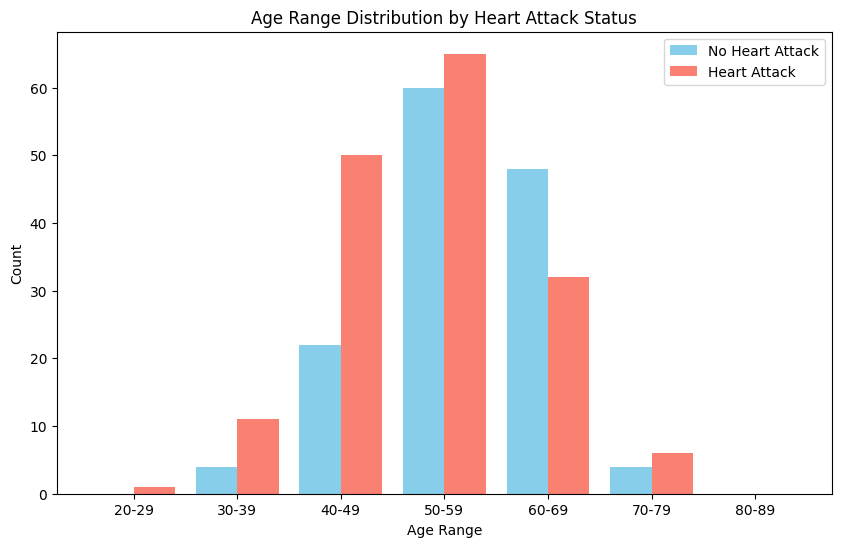

In [236]:
def plot_age_ranges(data_cleaned):
    # Create age ranges and add a new column 'Age Range' to the DataFrame
    age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
    age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
    data_cleaned['Age Range'] = pd.cut(data_cleaned['Age'], bins=age_bins, labels=age_labels, right=False)

    # Separate data for those who had a heart attack and those who didn't
    no_heart_attack = data_cleaned[data_cleaned['Heart Attack'] == 0]
    heart_attack = data_cleaned[data_cleaned['Heart Attack'] == 1]

    # Get counts for each age range
    counts_no_heart_attack = no_heart_attack['Age Range'].value_counts().sort_index()
    counts_heart_attack = heart_attack['Age Range'].value_counts().sort_index()

    # Create the bar plot with bars next to each other
    width = 0.4  # Adjust the width of the bars
    positions_no_heart_attack = np.arange(len(counts_no_heart_attack))
    positions_heart_attack = positions_no_heart_attack + width

    # Create the bar plots
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.bar(positions_no_heart_attack, counts_no_heart_attack, width=width, color='skyblue', label='No Heart Attack')
    plt.bar(positions_heart_attack, counts_heart_attack, width=width, color='salmon', label='Heart Attack')

    # Set titles and labels
    plt.title('Age Range Distribution by Heart Attack Status')
    plt.xlabel('Age Range')
    plt.ylabel('Count')
    plt.xticks(positions_no_heart_attack + width / 2, age_labels)  # Set x-axis tick positions and labels
    plt.legend()

    # Show the plot
    plt.show()

# Call the function with the correct DataFrame
plot_age_ranges(data_cleaned)

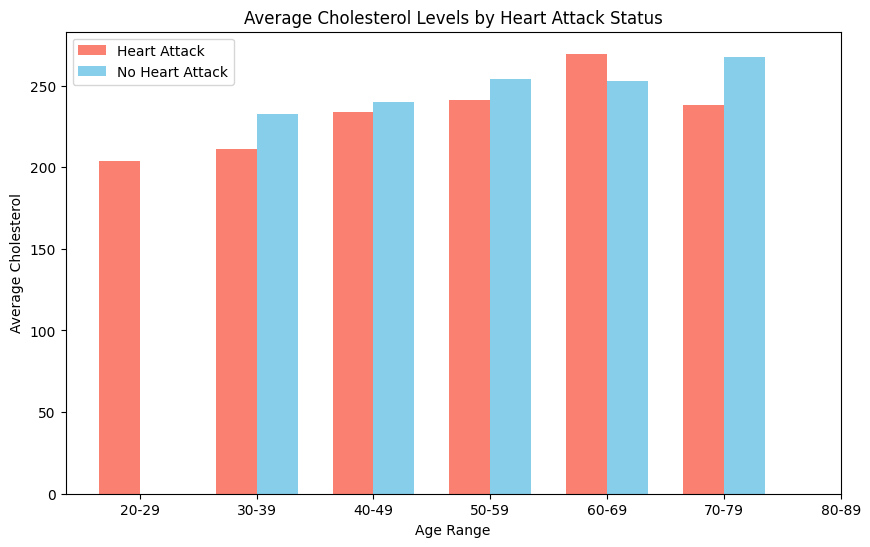

In [237]:
def plot_avg_cholesterol_by_age_range(data_cleaned):
    # Create age ranges and add a new column 'Age Range' to the DataFrame
    age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
    age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
    data_cleaned['Age Range'] = pd.cut(data_cleaned['Age'], bins=age_bins, labels=age_labels, right=False)

    # Calculate average cholesterol levels for individuals with and without a heart attack
    avg_cholesterol_heart_attack = data_cleaned[data_cleaned['Heart Attack'] == 1].groupby('Age Range', observed=False)['Chol'].mean()
    avg_cholesterol_no_heart_attack = data_cleaned[data_cleaned['Heart Attack'] == 0].groupby('Age Range', observed=False)['Chol'].mean()

    # Create the bar plot
    width = 0.35
    positions_heart_attack = np.arange(len(age_labels))
    positions_no_heart_attack = positions_heart_attack + width

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(positions_heart_attack, avg_cholesterol_heart_attack, width=width, color='salmon', label='Heart Attack')
    ax.bar(positions_no_heart_attack, avg_cholesterol_no_heart_attack, width=width, color='skyblue', label='No Heart Attack')

    # Set titles and labels
    ax.set_title('Average Cholesterol Levels by Heart Attack Status')
    ax.set_xlabel('Age Range')
    ax.set_ylabel('Average Cholesterol')
    ax.set_xticks(positions_heart_attack + width / 2)
    ax.set_xticklabels(age_labels)
    ax.legend()

    # Show the plot
    plt.show()

# Call the function with the correct DataFrame
plot_avg_cholesterol_by_age_range(data_cleaned)

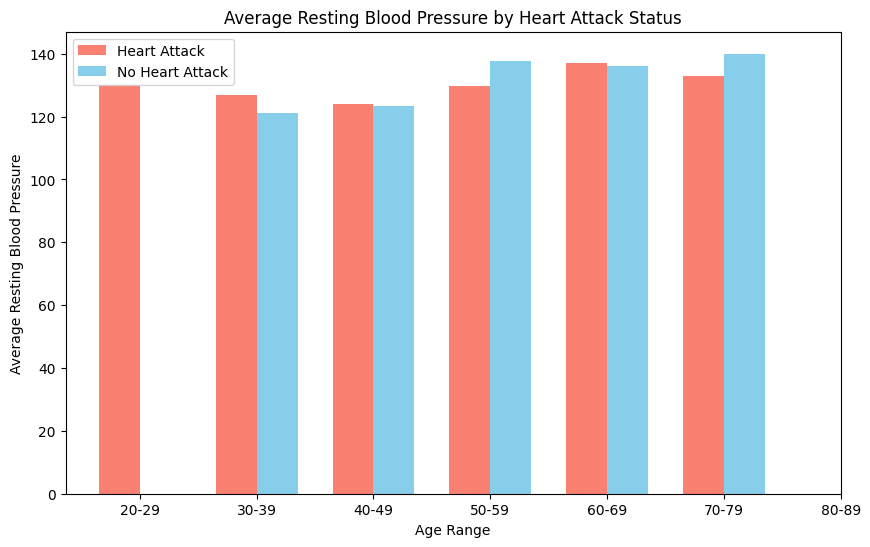

In [238]:
def plot_avg_resting_blood_pressure_by_heart_attack(data_cleaned):
    # Create age ranges and add a new column 'Age Range' to the DataFrame
    age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
    age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
    data_cleaned['Age Range'] = pd.cut(data_cleaned['Age'], bins=age_bins, labels=age_labels, right=False)

    # Calculate average resting blood pressure for individuals with and without a heart attack
    avg_rbp_heart_attack = data_cleaned[data_cleaned['Heart Attack'] == 1].groupby('Age Range', observed=False)['RBP'].mean()
    avg_rbp_no_heart_attack = data_cleaned[data_cleaned['Heart Attack'] == 0].groupby('Age Range', observed=False)['RBP'].mean()

    # Create the bar plot
    width = 0.35
    positions_heart_attack = np.arange(len(age_labels))
    positions_no_heart_attack = positions_heart_attack + width

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(positions_heart_attack, avg_rbp_heart_attack, width=width, color='salmon', label='Heart Attack')
    ax.bar(positions_no_heart_attack, avg_rbp_no_heart_attack, width=width, color='skyblue', label='No Heart Attack')

    # Set titles and labels
    ax.set_title('Average Resting Blood Pressure by Heart Attack Status')
    ax.set_xlabel('Age Range')
    ax.set_ylabel('Average Resting Blood Pressure')
    ax.set_xticks(positions_heart_attack + width / 2)
    ax.set_xticklabels(age_labels)
    ax.legend()

    # Show the plot
    plt.show()

# Call the function with the correct DataFrame
plot_avg_resting_blood_pressure_by_heart_attack(data_cleaned)

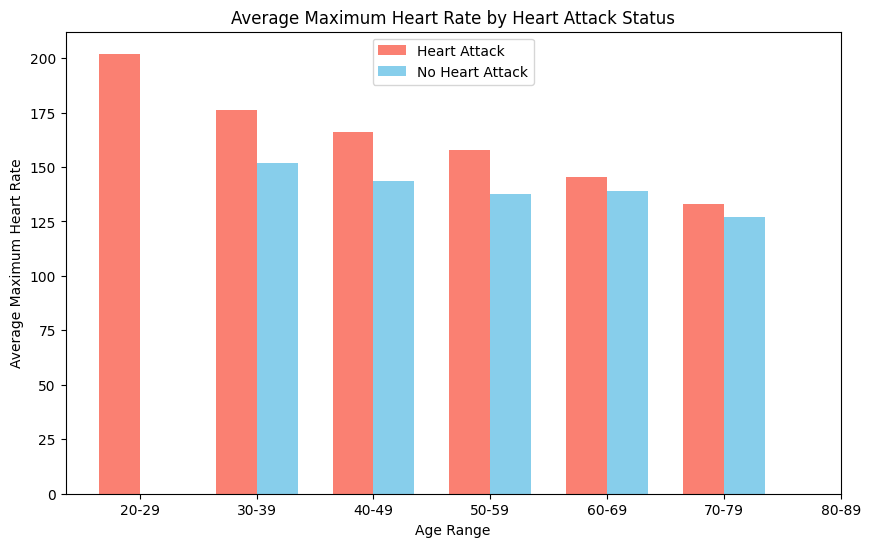

In [239]:
def plot_avg_max_heart_rate_by_heart_attack(data_cleaned):
    # Create age ranges and add a new column 'Age Range' to the DataFrame
    age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
    age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
    data_cleaned['Age Range'] = pd.cut(data_cleaned['Age'], bins=age_bins, labels=age_labels, right=False)

    # Calculate average maximum heart rate for individuals with and without a heart attack
    avg_max_heart_rate_heart_attack = data_cleaned[data_cleaned['Heart Attack'] == 1].groupby('Age Range', observed=False)['Max Heart Rate'].mean()
    avg_max_heart_rate_no_heart_attack = data_cleaned[data_cleaned['Heart Attack'] == 0].groupby('Age Range', observed=False)['Max Heart Rate'].mean()

    # Create the bar plot
    width = 0.35
    positions_heart_attack = np.arange(len(age_labels))
    positions_no_heart_attack = positions_heart_attack + width

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(positions_heart_attack, avg_max_heart_rate_heart_attack, width=width, color='salmon', label='Heart Attack')
    ax.bar(positions_no_heart_attack, avg_max_heart_rate_no_heart_attack, width=width, color='skyblue', label='No Heart Attack')

    # Set titles and labels
    ax.set_title('Average Maximum Heart Rate by Heart Attack Status')
    ax.set_xlabel('Age Range')
    ax.set_ylabel('Average Maximum Heart Rate')
    ax.set_xticks(positions_heart_attack + width / 2)
    ax.set_xticklabels(age_labels)
    ax.legend()

    # Show the plot
    plt.show()

# Call the function with the correct DataFrame
plot_avg_max_heart_rate_by_heart_attack(data_cleaned)

In [240]:
def generate_mock_person(min_values, max_values):
    # Create a mock new person with random values within the specified ranges
    mock_person = {
        'Age': np.random.randint(min_values['Age'], max_values['Age'] + 1),
        'Sex': np.random.randint(min_values['Sex'], max_values['Sex'] + 1),
        'Chest Pain': np.random.randint(min_values['Chest Pain'], max_values['Chest Pain'] + 1),
        'RBP': np.random.randint(min_values['RBP'], max_values['RBP'] + 1),
        'Chol': np.random.randint(min_values['Chol'], max_values['Chol'] + 1),
        'FBS': np.random.randint(min_values['FBS'], max_values['FBS'] + 1),
        'RECG': np.random.randint(min_values['RECG'], max_values['RECG'] + 1),
        'Max Heart Rate': np.random.randint(min_values['Max Heart Rate'], max_values['Max Heart Rate'] + 1),
        'EXNG': np.random.randint(min_values['EXNG'], max_values['EXNG'] + 1),
        'Old Peak': np.random.uniform(min_values['Old Peak'], max_values['Old Peak']),
        'Slope': np.random.randint(min_values['Slope'], max_values['Slope'] + 1),
        'CAA': np.random.randint(min_values['CAA'], max_values['CAA'] + 1),
        'Thalium': np.random.randint(min_values['Thalium'], max_values['Thalium'] + 1),
        'Heart Attack': 0  # Assume the mock person has no heart attack initially
    }

    return mock_person

# Example usage:
# Load data to get the min and max values for each attribute
min_values = data_cleaned.min()
max_values = data_cleaned.max()

# Generate a mock new person
mock_person = generate_mock_person(min_values, max_values)
print("Mock New Person:")
print(mock_person)

Mock New Person:
{'Age': 47, 'Sex': 0, 'Chest Pain': 1, 'RBP': 148, 'Chol': 274, 'FBS': 1, 'RECG': 1, 'Max Heart Rate': 167, 'EXNG': 0, 'Old Peak': 3.133001405442244, 'Slope': 0, 'CAA': 1, 'Thalium': 0, 'Heart Attack': 0}


In [241]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define features (X) and target variable (y)
X = data_cleaned.drop('Heart Attack', axis=1)
y = data_cleaned['Heart Attack']

# Separate numeric and categorical columns
numeric_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(include='object').columns

# Create transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create and train the logistic regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(random_state=42))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict whether the new person has a heart attack
mock_person_data = pd.DataFrame([mock_person])  # Convert the mock person dictionary to a DataFrame
probability = model.predict_proba(mock_person_data)[:, 1]  # Probability of having a heart attack

# Display the prediction and probability
prediction = model.predict(mock_person_data)
print("Prediction:")
if prediction[0] == 1:
    print("The model predicts that the new person has a heart attack.")
else:
    print("The model predicts that the new person does not have a heart attack.")

print("\nProbability of having a heart attack:")
print(f"{probability[0]:.2%}")

Prediction:
The model predicts that the new person has a heart attack.

Probability of having a heart attack:
84.50%


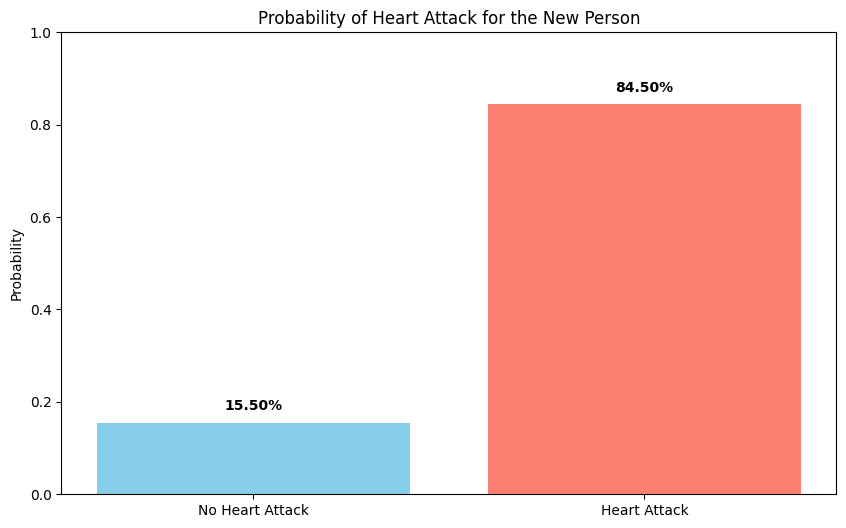

In [242]:
def plot_probability_chart(model, mock_person_data):
    # Predict the probability of a heart attack
    probability = model.predict_proba(mock_person_data)[:, 1]

    # Plot the probability bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(['No Heart Attack', 'Heart Attack'], [1 - probability[0], probability[0]], color=['skyblue', 'salmon'])
    ax.set_ylabel('Probability')
    ax.set_title('Probability of Heart Attack for the New Person')
    ax.set_ylim(0, 1)

    # Display the probability value on top of each bar
    for i, val in enumerate([1 - probability[0], probability[0]]):
        ax.text(i, val + 0.02, f'{val:.2%}', ha='center', va='bottom', fontweight='bold')

    plt.show()

plot_probability_chart(model, mock_person_data)

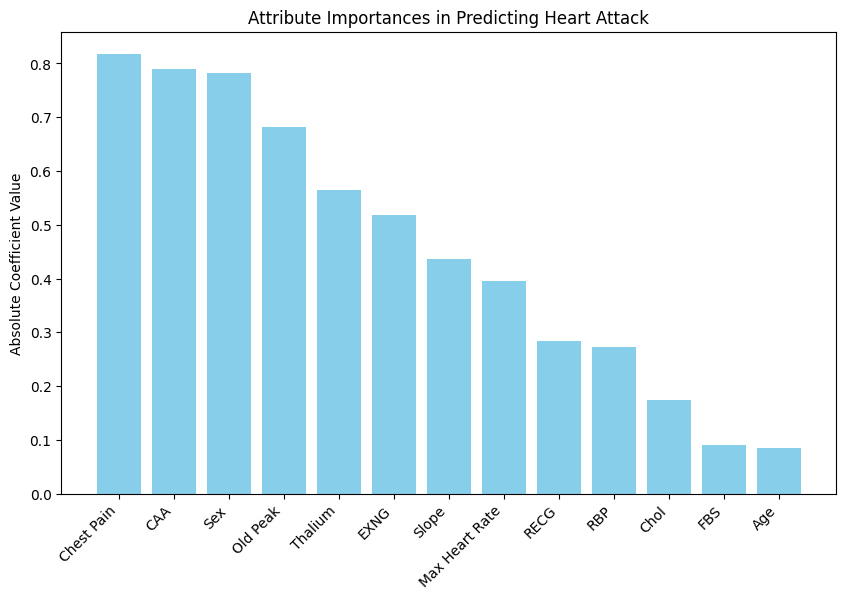

In [243]:
def plot_feature_importance(model, feature_names):
    # Extract feature importances from the logistic regression model
    importances = model.named_steps['classifier'].coef_[0]
    abs_importances = np.abs(importances)
    
    # Sort features based on their absolute importances
    sorted_indices = np.argsort(abs_importances)[::-1]
    sorted_importances = abs_importances[sorted_indices]
    sorted_features = np.array(feature_names)[sorted_indices]
    
    # Plot the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(sorted_features, sorted_importances, color='skyblue')
    ax.set_ylabel('Absolute Coefficient Value')
    ax.set_title('Attribute Importances in Predicting Heart Attack')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    plt.show()

feature_names = X_train.columns
plot_feature_importance(model, feature_names)

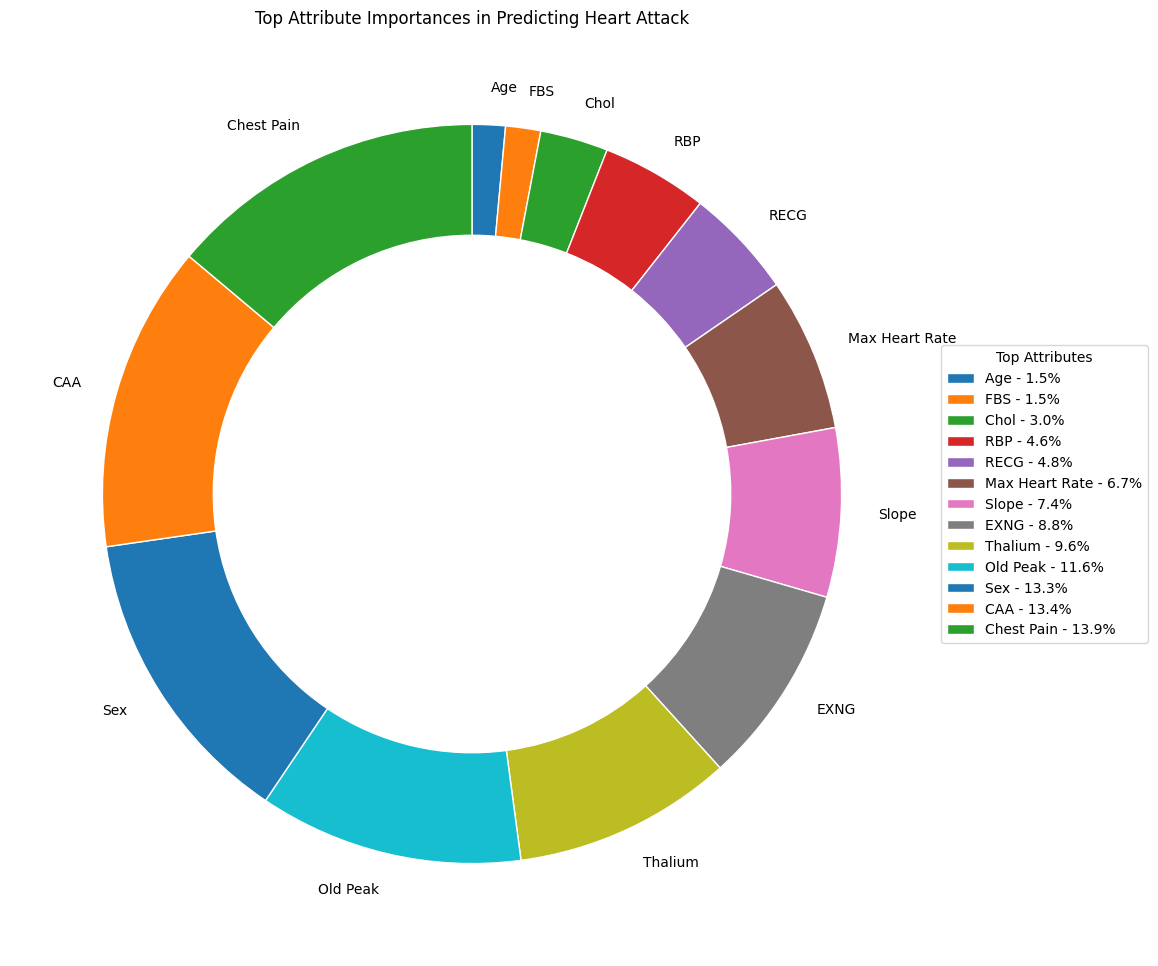

In [244]:
def plot_pie_chart_feature_importance(model, feature_names, top_n=5):
    # Extract feature importances from the logistic regression model
    importances = model.named_steps['classifier'].coef_[0]
    abs_importances = np.abs(importances)
    
    # Normalize the importances to sum to 1 for the pie chart
    normalized_importances = abs_importances / abs_importances.sum()

    # Get the indices of the top_n features
    top_indices = np.argsort(normalized_importances)[-top_n:]
    top_features = np.array(feature_names)[top_indices]
    top_importances = normalized_importances[top_indices]

    # Plot the pie chart for top features
    fig, ax = plt.subplots(figsize=(12, 12))
    wedges, texts, autotexts = ax.pie(top_importances, labels=top_features, autopct='', startangle=90, counterclock=False,
                                     wedgeprops=dict(width=0.3, edgecolor='w'))

    # Add legend with percentages
    legend_labels = [f'{label} - {percent:.1%}' for label, percent in zip(top_features, top_importances)]
    ax.legend(wedges, legend_labels, title='Top Attributes', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

    ax.set_title('Top Attribute Importances in Predicting Heart Attack')

    plt.show()
    
plot_pie_chart_feature_importance(model, feature_names, top_n=13)